# RNN for image classification


In [1]:
from keras.layers import Input, LSTM, GlobalMaxPooling1D, Dense, Flatten
from keras.models import Model

# from keras.optimizers import Adam
from keras.optimizers.legacy import Adam  # For macos compatibility
from keras.datasets import fashion_mnist

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
# Loading data
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
# Setting hyperparameters
T = 28
D = 28
N = len(X_train)

In [5]:
# Creating model
i = Input(shape=X_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Checking model's summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm (LSTM)                 (None, 128)               80384     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 81674 (319.04 KB)
Trainable params: 81674 (319.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Compiling and training model
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

r = model.fit(X_train, Y_train, epochs=8, validation_data=(X_test, Y_test))

Epoch 1/8
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5488 - accuracy: 0.7984 - val_loss: 0.4172 - val_accuracy: 0.8456
Epoch 2/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3740 - accuracy: 0.8638 - val_loss: 0.3821 - val_accuracy: 0.8565
Epoch 3/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3389 - accuracy: 0.8737 - val_loss: 0.3664 - val_accuracy: 0.8613
Epoch 4/8
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3215 - accuracy: 0.8809 - val_loss: 0.3571 - val_accuracy: 0.8691
Epoch 5/8
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3078 - accuracy: 0.8855 - val_loss: 0.3625 - val_accuracy: 0.8707
Epoch 6/8
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2961 - accuracy: 0.8889 - val_loss: 0.3416 - val_accuracy: 0.8724
Epoch 7/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2854 - accuracy: 0.8925 - val_loss: 0.3355 - val_accuracy:

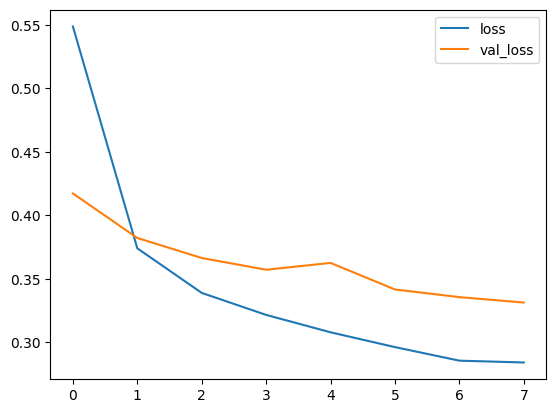

In [8]:
# Plotting results
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

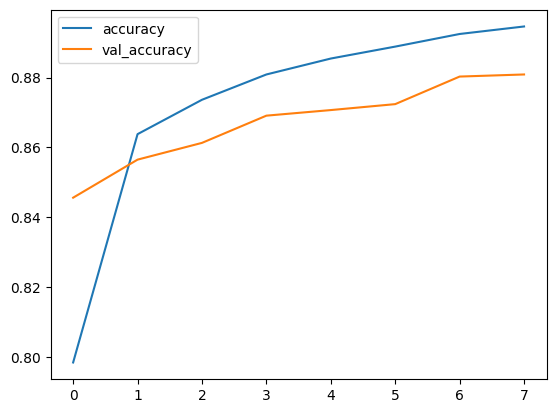

In [9]:
# Plotting results
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [11]:
# Getting predictions
Y_preds = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step
